In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
import plotly.express as px
import plotly.graph_objects as go

In [22]:
data=pd.read_csv("../data/BNB.csv")
data

,DateTime,BNBL
0,2020-04-23 06:34:02,28
1,2020-04-23 09:34:02,28
2,2020-04-24 06:34:01,28
3,2020-04-24 09:34:02,28
4,2020-04-27 06:33:57,28
...,...,...
2496,2022-07-14 03:55:56,33
2497,2022-07-14 04:55:53,33
2498,2022-07-14 05:55:54,33
2499,2022-07-14 07:55:52,33


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  2501 non-null   object
 1   BNBL      2501 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.2+ KB


In [24]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','BNBL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,28
1,2020-04-23,28
2,2020-04-24,28
3,2020-04-24,28
4,2020-04-27,28
...,...,...
2496,2022-07-14,33
2497,2022-07-14,33
2498,2022-07-14,33
2499,2022-07-14,33


In [25]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True) 
data

,price
date,
2020-04-23,28
2020-04-23,28
2020-04-24,28
2020-04-24,28
2020-04-27,28
...,...
2022-07-14,33
2022-07-14,33
2022-07-14,33


In [26]:
data = data.groupby(data.index).mean()
data

,price
date,
2020-04-23,28.0
2020-04-24,28.0
2020-04-27,28.0
2020-04-28,28.0
2020-04-29,28.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


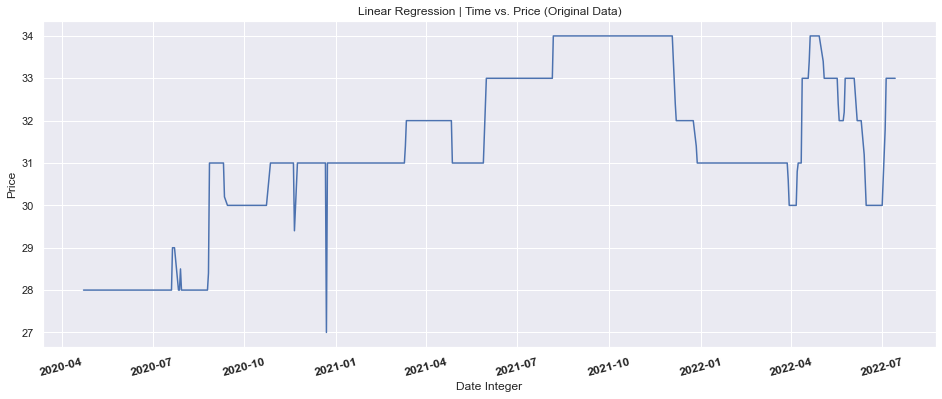

In [27]:
plt.figure(figsize = (16,6))
plt.plot(data['price'])
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.xlabel('Date Integer')
plt.ylabel('Price')
plt.xticks(rotation=15, fontweight='bold',  fontsize='large',)
plt.show()

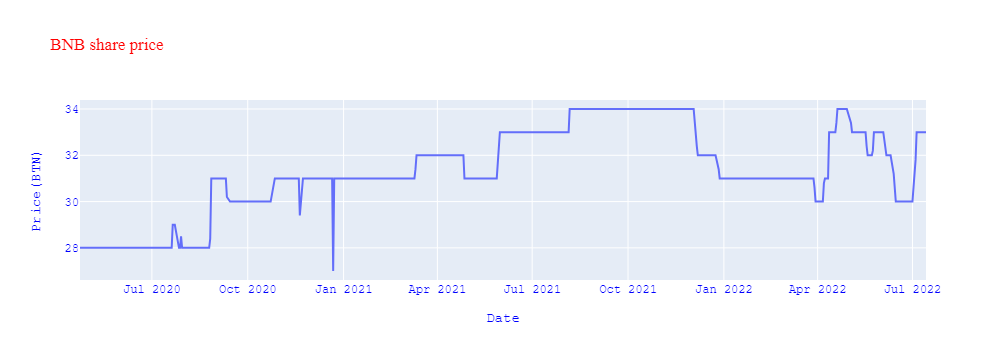

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data["price"], name="price", mode="lines"))

fig.update_layout(
    title = 'BNB share price',
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    xaxis_title = 'Date',
    yaxis_title = 'Price(BTN)'
)


fig.show()

In [30]:
x = np.arange(len(data.index))

In [31]:
y = data['price'].values

In [32]:
#making x and y in a column each 
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [35]:
print('Attributes size is: ', x.shape)
print('Labels size is: ', y.shape)

Attributes size is:  (547, 1)
Labels size is:  (547, 1)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [37]:
print('Training Attributes size is: ',X_train.shape)
print('Testing Attributes size is: ',X_test.shape)
print('Training Labels size is: ',y_train.shape)
print('Testing Lables size is: ' ,y_test.shape)

Training Attributes size is:  (355, 1)
Testing Attributes size is:  (192, 1)
Training Labels size is:  (355, 1)
Testing Lables size is:  (192, 1)


In [39]:
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [40]:
print('Intercept is: ',lr_model.intercept_)#For retrieving the slope:
print('Coefficient is: ',lr_model.coef_)

Intercept is:  [29.13053879]
Coefficient is:  [[0.00783748]]


In [41]:
lr_predict = lr_model.predict(X_test)

In [48]:
act_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lr_predict.flatten()})
act_pred.head(10)

,Actual,Predicted
0,28.0,29.796725
1,31.0,32.563355
2,31.0,29.882937
3,31.0,30.478585
4,31.0,30.180761
5,28.0,29.420526
6,33.0,33.151166
7,31.0,29.835912
8,33.0,33.080629
9,34.0,32.147969


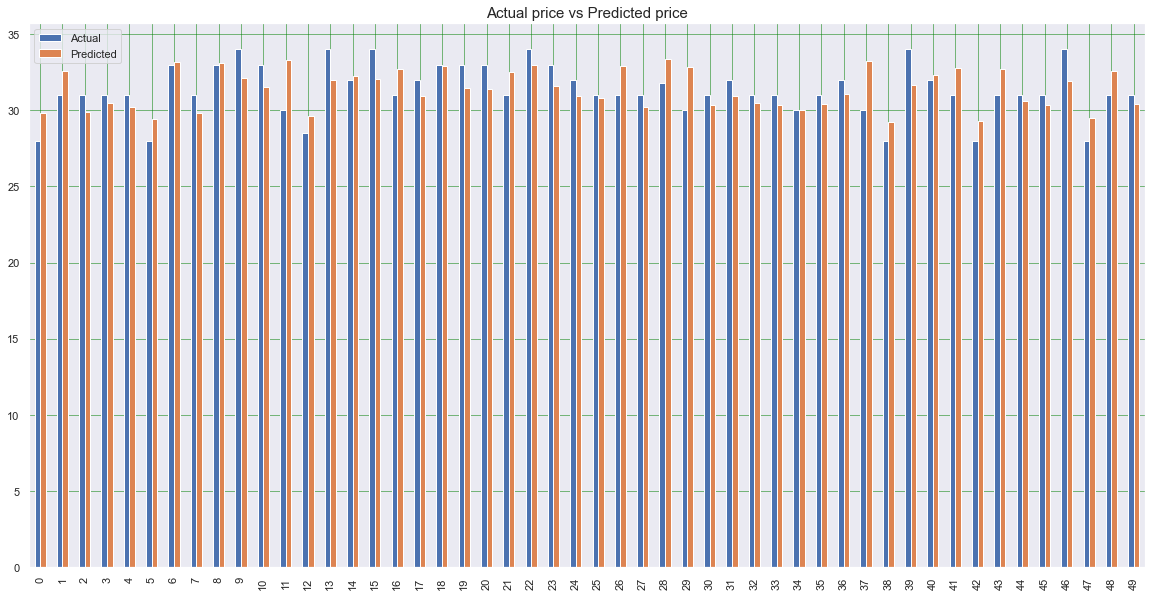

In [71]:
dff = act_pred.head(50)
dff.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual price vs Predicted price',fontsize = 15)
plt.show()

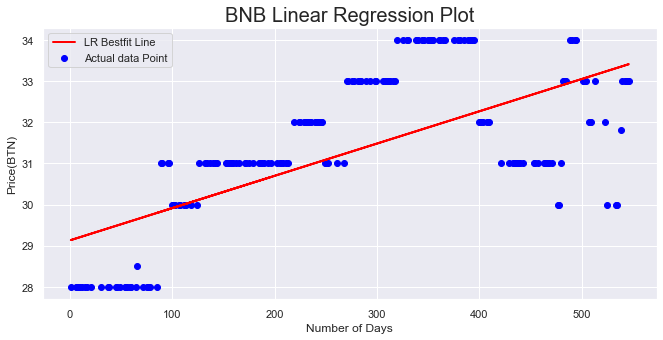

In [52]:
plt.figure(figsize=(11,5))
plt.scatter(X_test, y_test,  color='blue',label='Actual data Point')
plt.plot(X_test, lr_predict, color='red', linewidth=2,label='LR Bestfit Line')
plt.title('BNB Linear Regression Plot', fontsize=20)
plt.ylabel('Price(BTN)')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [54]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
RMSE_lr=math.sqrt(mean_squared_error(y_test,lr_predict))
MAE_lr=mean_absolute_error(y_test,lr_predict)
R2_lr=r2_score(y_test,lr_predict)
print("RMSE:", RMSE_lr)
print("MAE:", MAE_lr)
print("R-Squared:", R2_lr)

#LOW R-squared

RMSE: 1.3800324372719375
MAE: 1.1711655043061873
R-Squared: 0.43042744726658144


In [63]:
#prediction for next 30 days
forecast_lr = []
for i in range(1,31):
    forecast_lr.append(lr_model.predict(np.array(x.max()+i).reshape(-1,1))[0][0])
   

In [64]:
print(type(forecast_lr))

<class 'list'>


In [65]:
day_new = np.arange(0,547)
day_pred = np.arange(547,577)

In [66]:
act_pred

,Actual,Predicted
0,28.0,29.796725
1,31.0,32.563355
2,31.0,29.882937
3,31.0,30.478585
4,31.0,30.180761
...,...,...
187,31.0,30.470748
188,34.0,31.795282
189,31.0,30.745060
190,31.0,30.368861


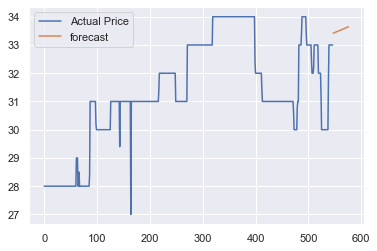

In [68]:
plt.plot(day_new, data['price'],label = 'Actual Price')
plt.plot(day_pred, forecast_lr, label = 'forecast')
plt.legend()
plt.show()

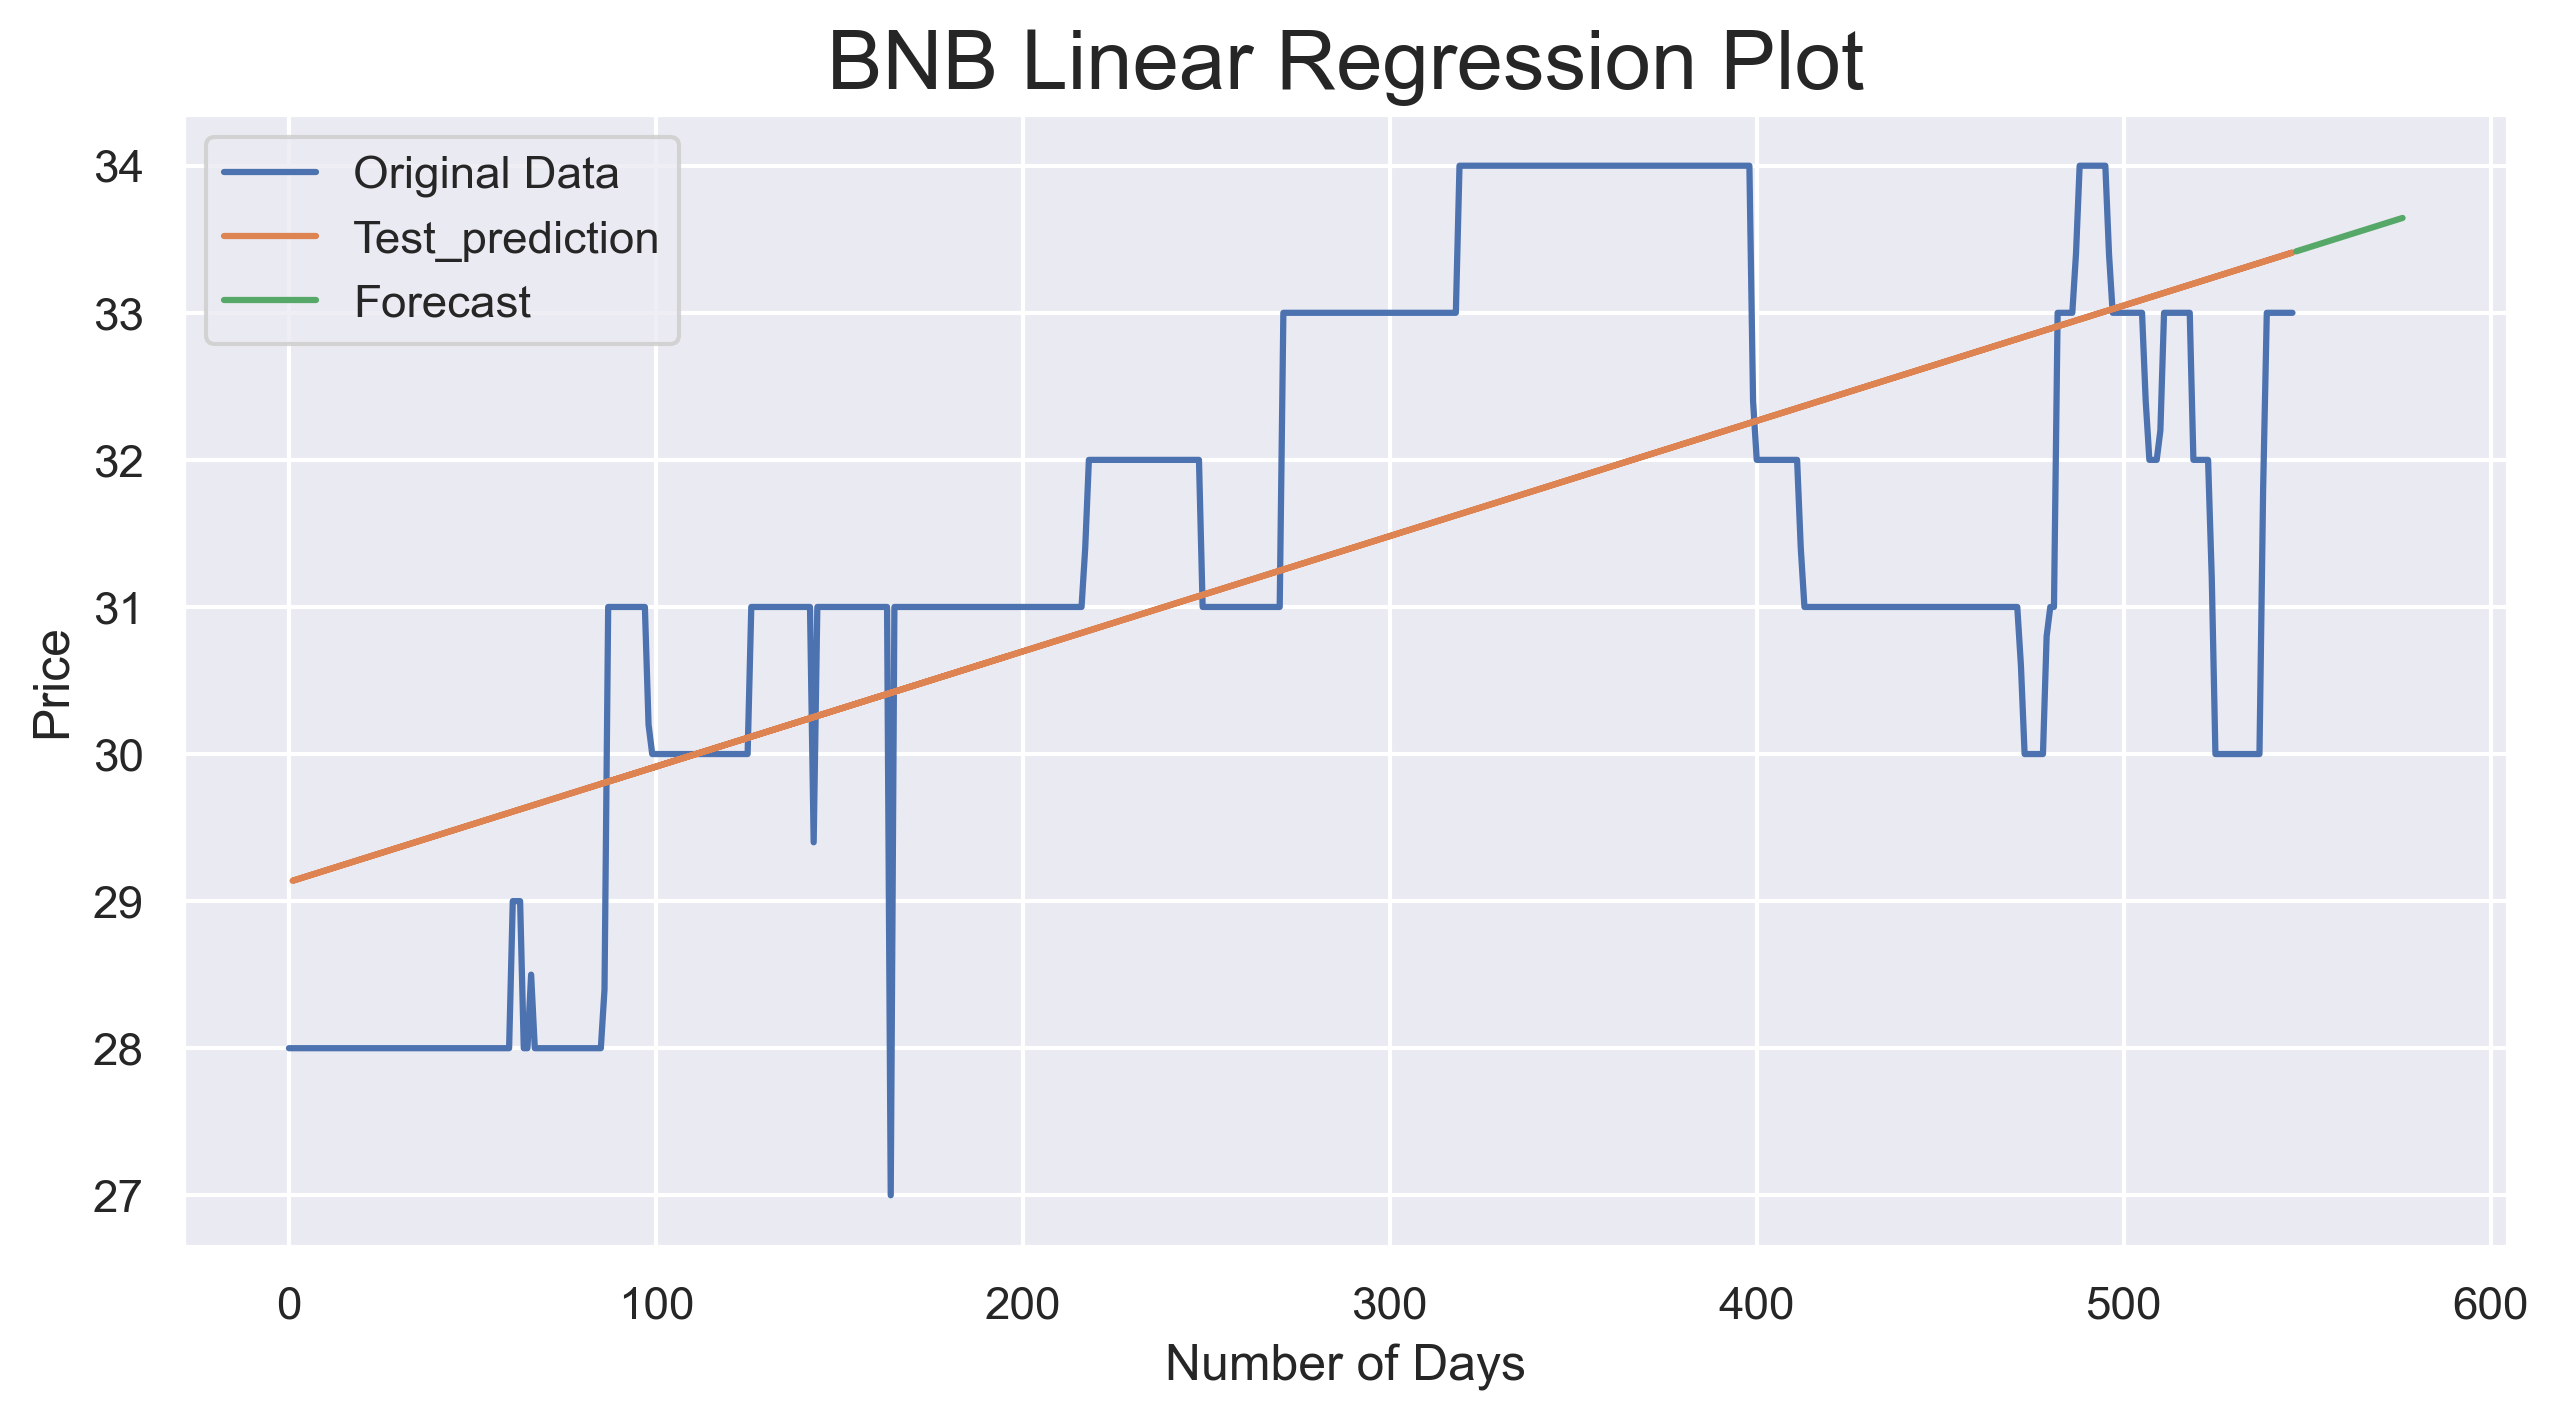

In [72]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(day_new, data['price'], label='Original Data')
#plt.plot(trainPredictPlot,label='Trained data')
plt.plot(X_test, lr_predict, label='Test_prediction')
plt.plot(day_pred,forecast_lr, label='Forecast')
plt.title('BNB Linear Regression Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [76]:
type(lr_predict)

numpy.ndarray

In [80]:
test_pred = pd.DataFrame(lr_predict,columns = ['predicted_price'])
test_pred

,predicted_price
0,29.796725
1,32.563355
2,29.882937
3,30.478585
4,30.180761
...,...
187,30.470748
188,31.795282
189,30.745060
190,30.368861


In [83]:
len(X_test)

192

In [85]:
len(X_train)

355

In [114]:
#to know the date of test data
data.iloc[355:]  

,price
date,
2021-09-29,34.0
2021-09-30,34.0
2021-10-01,34.0
2021-10-04,34.0
2021-10-05,34.0
...,...
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0


In [87]:
test_pred['date'] = pd.date_range(start='2021-09-29', periods=192, freq='D')
test_pred

,predicted_price,date
0,29.796725,2021-09-29
1,32.563355,2021-09-30
2,29.882937,2021-10-01
3,30.478585,2021-10-02
4,30.180761,2021-10-03
...,...,...
187,30.470748,2022-04-04
188,31.795282,2022-04-05
189,30.745060,2022-04-06
190,30.368861,2022-04-07


In [89]:
col = ['date','predicted_price']
test_pred = test_pred[col]
test_pred

,date,predicted_price
0,2021-09-29,29.796725
1,2021-09-30,32.563355
2,2021-10-01,29.882937
3,2021-10-02,30.478585
4,2021-10-03,30.180761
...,...,...
187,2022-04-04,30.470748
188,2022-04-05,31.795282
189,2022-04-06,30.745060
190,2022-04-07,30.368861


In [90]:
test_pred = test_pred.set_index('date')

In [91]:
test_pred = test_pred.to_csv('predictedData/bnb_lr_testPred.csv')

In [107]:
forecast_lr

[33.417640312345526,
 33.42547779228018,
 33.433315272214834,
 33.441152752149485,
 33.448990232084135,
 33.456827712018786,
 33.46466519195344,
 33.472502671888094,
 33.480340151822745,
 33.488177631757395,
 33.496015111692046,
 33.5038525916267,
 33.511690071561354,
 33.519527551496004,
 33.52736503143066,
 33.53520251136531,
 33.54303999129996,
 33.550877471234614,
 33.558714951169264,
 33.56655243110392,
 33.57438991103857,
 33.58222739097322,
 33.59006487090788,
 33.59790235084253,
 33.60573983077718,
 33.61357731071183,
 33.62141479064648,
 33.62925227058114,
 33.63708975051579,
 33.64492723045044]

In [108]:
type(forecast_lr)

list

In [109]:
forecast  = pd.DataFrame(forecast_lr,columns = ['predicted_price'])
forecast.head()

,predicted_price
0,33.417640
1,33.425478
2,33.433315
3,33.441153
4,33.448990


In [110]:
#display the final date of the original data
data.tail()

,price
date,
2022-07-08,33.0
2022-07-11,33.0
2022-07-12,33.0
2022-07-13,33.0
2022-07-14,33.0


In [111]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_price,date
0,33.417640,2022-07-15
1,33.425478,2022-07-16
2,33.433315,2022-07-17
3,33.441153,2022-07-18
4,33.448990,2022-07-19


In [112]:
forecast = forecast.set_index('date')
forecast

,predicted_price
date,
2022-07-15,33.417640
2022-07-16,33.425478
2022-07-17,33.433315
2022-07-18,33.441153
2022-07-19,33.448990
2022-07-20,33.456828
2022-07-21,33.464665
2022-07-22,33.472503
2022-07-23,33.480340


In [113]:
forecast = forecast.to_csv('predictedData/bnb_lr_forecast.csv')